In [2]:
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats("svg")
import torch
import torchvision
import torchvision.transforms as T 

from tqdm.auto import tqdm

device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/dl-lab/dataset/dl.zip

In [ ]:
transforms=T.Compose(transforms=[T.ToTensor()])
dataset_train=torchvision.datasets.ImageFolder(root="dl/TRAIN DATA",transform=transforms)
dataset_test=torchvision.datasets.ImageFolder(root="dl/TEST DATA",transform=transforms)

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=4, shuffle=True)
test_loader=  torch.utils.data.DataLoader(dataset_test, batch_size=len(dataset_test.imgs), shuffle=True)

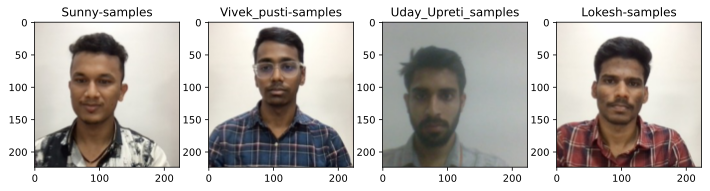

In [ ]:
fig,axs=plt.subplots(1,4,figsize=(12,4))
images_2_show=next(iter(train_loader))
for idx,ax in enumerate(axs.flatten()):
  ax.imshow(images_2_show[0][idx,:,:,:].permute(1,2,0))
  ax.set_title(dataset_train.classes[images_2_show[1][idx]])

In [ ]:
def build_model():

    model=nn.Sequential(
        # block 1
        nn.Conv2d(3,10,3,1,1),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        # block 2
        nn.Conv2d(10,20,3,1,1),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        # block 3
        nn.Conv2d(20,20,3,1,1),
        nn.ReLU(),
        nn.MaxPool2d(2,2),

        nn.Flatten(),
        nn.Linear(15680,128),
        nn.ReLU(),
        nn.Linear(128,15)
    )

    optimizer=torch.optim.Adam(params=model.parameters(),lr=0.001)
    lossfun=nn.CrossEntropyLoss()

    return model,optimizer,lossfun

In [ ]:
def train_model(model,optimizer,lossfun):
  epochs=10
  train_acc=[]
  test_acc=[]
  losses=[]

  model.to(device)

  for i in range(epochs):

    batch_loss=[]
    batch_train_acc=[]

    for x,y in tqdm(train_loader):
      
      x=x.to(device)
      y=y.to(device)

      yhat=model(x)
      loss=lossfun(yhat,y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      batch_loss.append(loss.item())

      batch_train_acc.append((torch.mean((torch.argmax(yhat,axis=1)==y).float()).item()*100))

    losses.append(np.mean(batch_loss))
    train_acc.append(np.mean(batch_train_acc))

    for x,y in test_loader:
      x=x.to(device)
      y=y.to(device)
      yhat=model(x)

      test_acc.append((torch.mean((torch.argmax(yhat,axis=1)==y).float()).item()*100))

  return losses,train_acc,test_acc,model



In [ ]:
model,optimizer,lossfun=build_model()
losses,train_acc,test_acc,model=train_model(model,optimizer,lossfun)

  0%|          | 0/124 [00:00<?, ?it/s]

  0%|          | 0/124 [00:00<?, ?it/s]

  0%|          | 0/124 [00:00<?, ?it/s]

  0%|          | 0/124 [00:00<?, ?it/s]

  0%|          | 0/124 [00:00<?, ?it/s]

  0%|          | 0/124 [00:00<?, ?it/s]

  0%|          | 0/124 [00:00<?, ?it/s]

  0%|          | 0/124 [00:00<?, ?it/s]

  0%|          | 0/124 [00:00<?, ?it/s]

  0%|          | 0/124 [00:00<?, ?it/s]

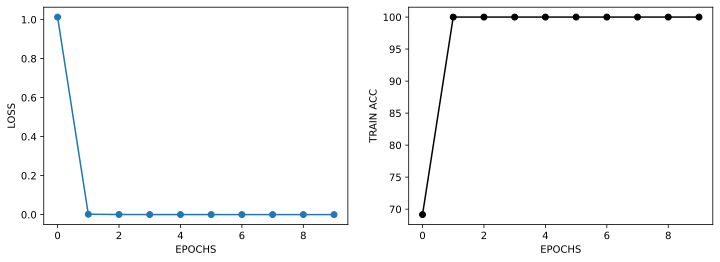

In [ ]:
fig,axs=plt.subplots(1,2,figsize=(12,4))


axs[0].plot(losses,"o-")
axs[0].set_xlabel("EPOCHS")
axs[0].set_ylabel("LOSS")

axs[1].plot(train_acc,"ko-")
axs[1].set_xlabel("EPOCHS")
axs[1].set_ylabel("TRAIN ACC")

plt.show()

**TESTING OUR MODEL ON THE TEST DATA**





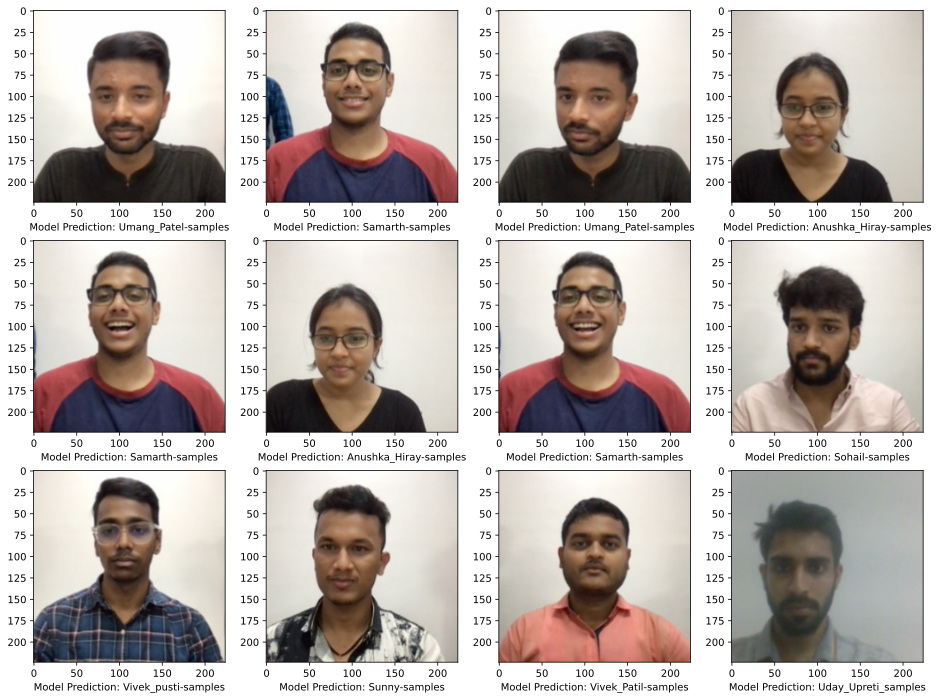

In [ ]:
fig,axs=plt.subplots(3,4,figsize=(16,12))
images_2_show=next(iter(test_loader))

model.cpu()
model_prediction=model(images_2_show[0])

for idx,ax in enumerate(axs.flatten()):
  ax.imshow(images_2_show[0][idx,:,:,:].permute(1,2,0))
  pred=dataset_train.classes[torch.argmax(model_prediction,axis=1)[idx]]
  reality=dataset_train.classes[images_2_show[1][idx]]
  ax.set_xlabel(f"Model Prediction: {pred}")
  
  